In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/amazon-stock-price-all-time/Amazon.csv


In [2]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")

In [3]:
viz = df.copy()

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(6155, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6155.0,5.205563e+02,8.571617e+02,1.406250,3.875000e+01,9.267000e+01,5.289500e+02,3.744000e+03
High,6155.0,5.262161e+02,8.658210e+02,1.447917,3.951500e+01,9.419000e+01,5.353050e+02,3.773080e+03
Low,6155.0,5.142773e+02,8.472709e+02,1.312500,3.810500e+01,9.075000e+01,5.219500e+02,3.696790e+03
Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Adj Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Volume,6155.0,7.329010e+06,7.149521e+06,487200.000000,3.579350e+06,5.470000e+06,8.294950e+06,1.043292e+08


In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4960,2017-01-31,823.750000,826.989990,819.559998,823.479980,823.479980,3137200
2218,2006-03-10,36.240002,36.500000,35.740002,36.220001,36.220001,4972700
176,1998-01-27,4.817708,4.864583,4.666667,4.750000,4.750000,4104000
2482,2007-03-29,39.650002,39.919998,39.299999,39.810001,39.810001,6405200
1022,2001-06-05,17.059999,17.920000,16.000000,16.440001,16.440001,12758100
5326,2018-07-16,1821.949951,1841.949951,1814.449951,1822.489990,1822.489990,5466200
1287,2002-06-28,15.690000,16.360001,15.400000,16.250000,16.250000,6237900
5150,2017-10-31,1109.000000,1110.540039,1101.119995,1105.280029,1105.280029,3477000
226,1998-04-08,7.197917,7.479167,7.125000,7.385417,7.385417,11314800
3458,2011-02-10,184.389999,187.240005,183.600006,186.210007,186.210007,5331400


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5713,2020-01-29,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000
116,1997-10-29,5.145833,5.500000,5.000000,5.390625,5.390625,7126800
1017,2001-05-29,17.209999,17.540001,16.700001,17.219999,17.219999,9394900
477,1999-04-08,87.406250,92.062500,83.000000,89.500000,89.500000,11487800
5582,2019-07-23,1995.989990,1997.790039,1973.130005,1994.489990,1994.489990,2703500
2645,2007-11-19,78.830002,79.750000,77.940002,79.180000,79.180000,8649800
2901,2008-11-24,38.790001,43.439999,38.700001,42.500000,42.500000,14549700
857,2000-10-06,32.500000,33.250000,30.187500,31.562500,31.562500,8871100
5091,2017-08-08,994.349976,996.280029,985.789978,989.840027,989.840027,2902800
930,2001-01-23,18.375000,19.312500,18.250000,18.953125,18.953125,4744300


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [17]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-17,NaN
1997-05-18,NaN
1997-05-19,1.708333
...,...
2021-10-23,NaN
2021-10-24,NaN
2021-10-25,3320.370117


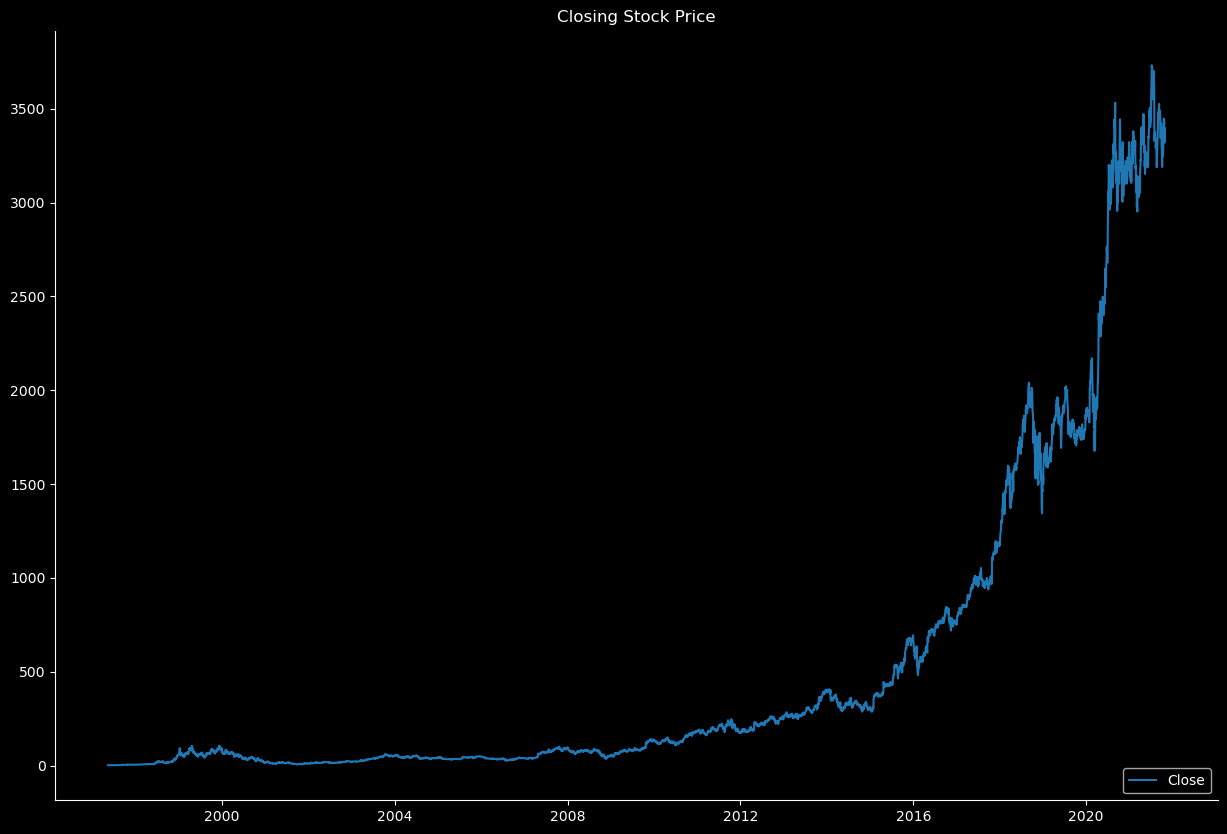

In [18]:
plt.figure(facecolor='black', figsize=(15,10))
ax = plt.axes()

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('white')      #setting up above X-axis tick color to red

ax.set_facecolor("black")               # Setting the background color of the plot using set_facecolor() method
plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close)
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

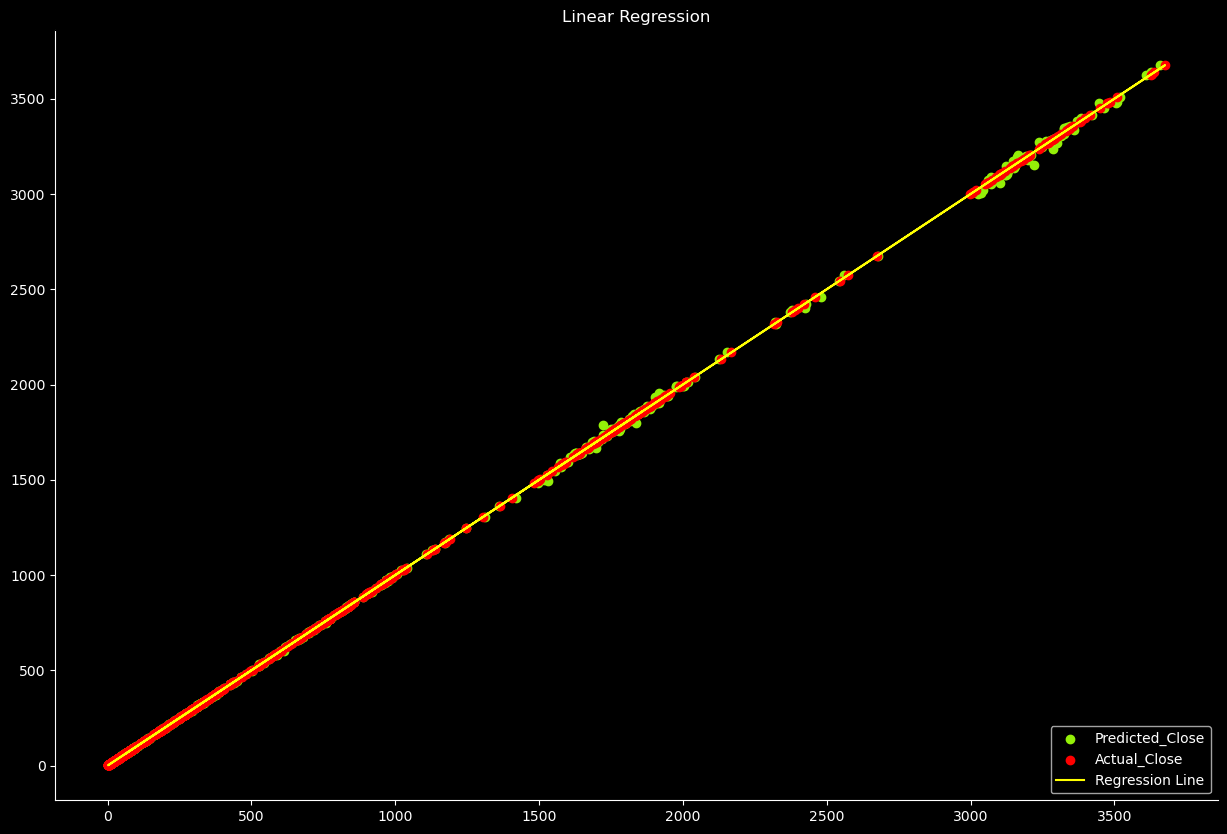

In [19]:
plt.figure(facecolor='black', figsize=(15,10))
ax = plt.axes()

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('white')      #setting up above X-axis tick color to red

ax.set_facecolor("black")               # Setting the background color of the plot using set_facecolor() method
plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')

In [20]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 41.257
RMSE 6.423
MAE 2.549
MAPE 0.009
R2 Score :  1.0


In [21]:
pred_df = test.copy()
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume
5713,2020-01-29,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000
116,1997-10-29,5.145833,5.500000,5.000000,5.390625,5.390625,7126800
1017,2001-05-29,17.209999,17.540001,16.700001,17.219999,17.219999,9394900
477,1999-04-08,87.406250,92.062500,83.000000,89.500000,89.500000,11487800
5582,2019-07-23,1995.989990,1997.790039,1973.130005,1994.489990,1994.489990,2703500
...,...,...,...,...,...,...,...
2007,2005-05-09,34.400002,34.799999,34.250000,34.639999,34.639999,4431600
2586,2007-08-27,80.559998,80.800003,78.419998,78.650002,78.650002,6951300
2968,2009-03-04,62.799999,65.790001,62.400002,64.809998,64.809998,11960900
4098,2013-08-28,280.359985,283.000000,279.329987,281.579987,281.579987,1457100


In [22]:
result = model.predict([[2.437500, 2.500000, 1.927083, 72156000]])
print(result)

[1.62180694]


In [23]:
pred_df['Close_Prediction'] = y_pred
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
5713,2020-01-29,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000,1866.139478
116,1997-10-29,5.145833,5.500000,5.000000,5.390625,5.390625,7126800,5.381662
1017,2001-05-29,17.209999,17.540001,16.700001,17.219999,17.219999,9394900,17.126106
477,1999-04-08,87.406250,92.062500,83.000000,89.500000,89.500000,11487800,87.891239
5582,2019-07-23,1995.989990,1997.790039,1973.130005,1994.489990,1994.489990,2703500,1979.955300
...,...,...,...,...,...,...,...,...
2007,2005-05-09,34.400002,34.799999,34.250000,34.639999,34.639999,4431600,34.693356
2586,2007-08-27,80.559998,80.800003,78.419998,78.650002,78.650002,6951300,79.162478
2968,2009-03-04,62.799999,65.790001,62.400002,64.809998,64.809998,11960900,64.992984
4098,2013-08-28,280.359985,283.000000,279.329987,281.579987,281.579987,1457100,281.865994


In [24]:
pred_df[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1231.0,514.427539,845.062416,1.479167,37.885001,89.500000,566.214996,3675.739990
Close_Prediction,1231.0,514.644140,845.603714,1.592602,38.109160,89.718943,564.113725,3658.571281
